# Cardiovascular Diseases - Heart Failure Prediction
    
    Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives 
    each year, which accounts for 31% of all deaths worlwide. Heart failure is a common event caused by CVDs and this
    dataset contains 12 features that can be used to predict mortality by heart failure.

    Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy
    diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

    People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk 
    factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and 
    management wherein a machine learning model can be of great help.

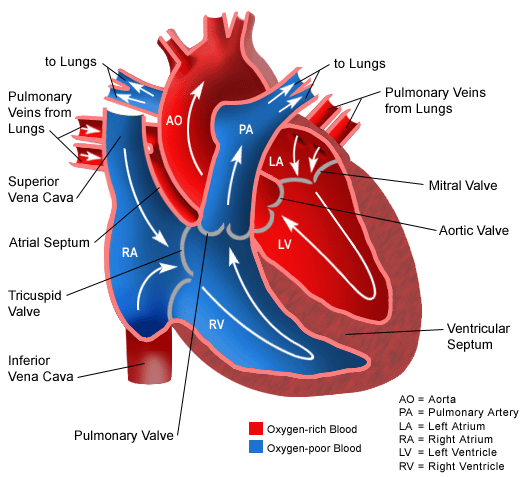

## Dataset Link 
 
 https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
 

## Dataset Description
 
 Feature | Explanation | Measurement	| Range
------------- | ------------- |------------- | -------------
Age	|Age of the patient	|Years |	[40,..., 95]
Anaemia	|Decrease of red <br> blood cells or hemoglobin |	Boolean|	0, 1
High blood pressure |	If a patient has hypertension |	Boolean	 |0, 1
Creatinine phosphokinase<br>(CPK) |	Level of the CPK enzyme <br>in the blood |	mcg/L|	[23,..., 7861]
Diabetes|	If the patient has diabetes |	Boolean	| 0, 1
Ejection fraction|	Percentage of blood leaving<br>the heart at each contraction|Percentage	|	[14,..., 80]
Sex	| Woman or man |	Binary|	0, 1
Platelets|	Platelets in the blood|	kiloplatelets/mL|	[25.01,..., 850.00]
Serum creatinine|	Level of creatinine in the blood|	mg/dL|	[0.50,..., 9.40]
Serum sodium|	Level of sodium in the blood|	mEq/L|	[114,..., 148]
Smoking|	If the patient smokes|	Boolean	|0, 1
Time|	Follow-up period|	Days|	[4,...,285]
DEATH EVENT<br>(TARGET)|	If the patient died during the follow-up period|	Boolean|	0, 1



## 1. Importing libraries & loading dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## 2. Data Preprocessing

### 2.1 checking the datatype

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### 2.2 Descriptive analysis

In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### 2.3 checking the missing values

In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

- there are no missing values

### 2.4 checking the correation b/w features

In [6]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<AxesSubplot:>

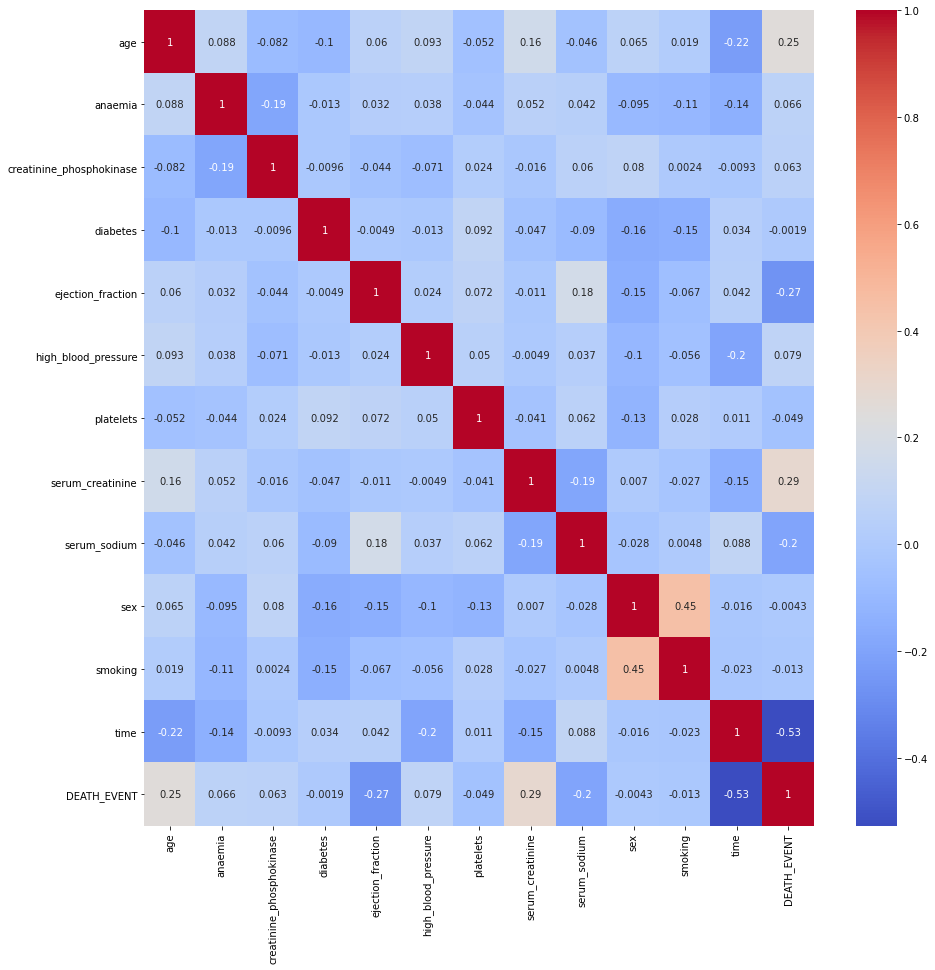

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot = True, cmap  = 'coolwarm')

#### 2.4.1 checking the correlation w.r.t.  death event

In [8]:
df.corrwith(df['DEATH_EVENT'])

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
time                       -0.526964
DEATH_EVENT                 1.000000
dtype: float64

## 3. Data visualization

### 3.1 anaemia or non-aneamic

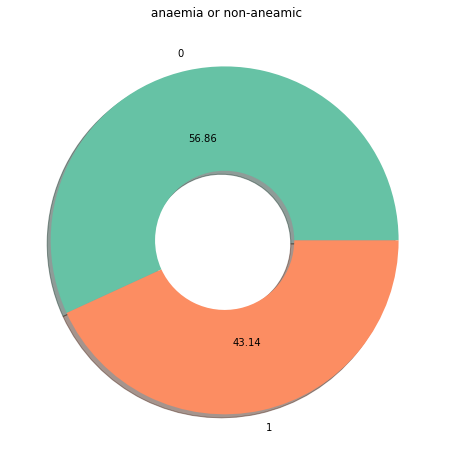

In [9]:
v=  df['anaemia'].value_counts()

fig  =plt.gcf()
fig.set_size_inches((10,8))
cmap = plt.get_cmap('Set2')
color=  cmap(np.arange(len(v)))
plt.pie(v,labels = v.index ,autopct = '%0.02f', colors = color, shadow = True, wedgeprops = dict(width = 0.6), radius = 1)
plt.title(' anaemia or non-aneamic')
plt.show()

<font color = green size = "5">Insight:</font>

**`  ~43% of the population under study have aneamic symptoms while ~57% are non-aneamic.`**


### 3.2 diabetes Vs non-diabetes

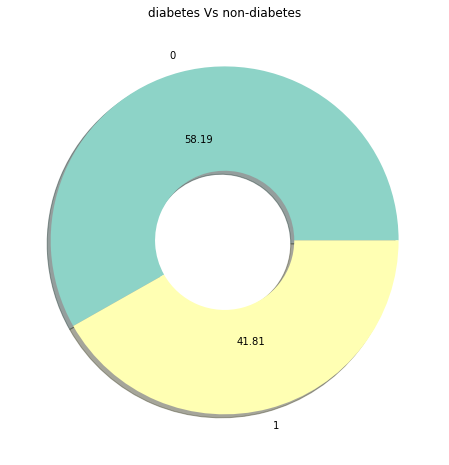

In [10]:
v  = df['diabetes'].value_counts()
fig  =plt.gcf()
fig.set_size_inches((10,8))
cmap = plt.get_cmap('Set3')
color=  cmap(np.arange(len(v)))
plt.pie(v,labels = v.index ,autopct = '%0.02f', colors = color, shadow = True, wedgeprops = dict(width = 0.6), radius = 1)
plt.title('diabetes Vs non-diabetes')
plt.show()

<font color = green size = "5">Insight:</font>

**`~42% of the population have diabetes while ~58% don't have non-diabetes.`**

### 3.3 High blood pressure Vs Normal blood pressure

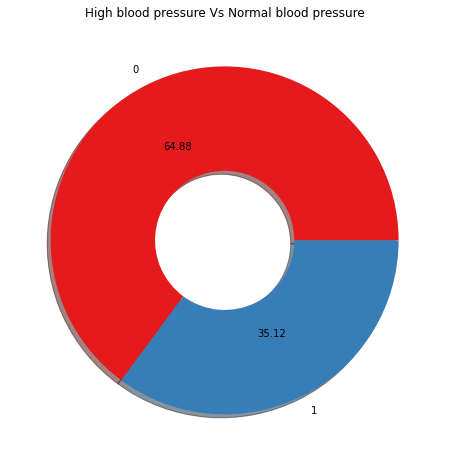

In [11]:
v = df['high_blood_pressure'].value_counts()
fig  =plt.gcf()
fig.set_size_inches((10,8))
cmap = plt.get_cmap('Set1')
color=  cmap(np.arange(len(v)))
plt.pie(v,labels = v.index ,autopct = '%0.02f', colors = color, shadow = True, wedgeprops = dict(width = 0.6), radius = 1)
plt.title('High blood pressure Vs Normal blood pressure')
plt.show()

<font color = green size = "5">Insight:</font>

**`~35% of the population have hypertension or high bloob pressure while ~65% have normal blood pressure.`**

### 3.4 Male Vs Female

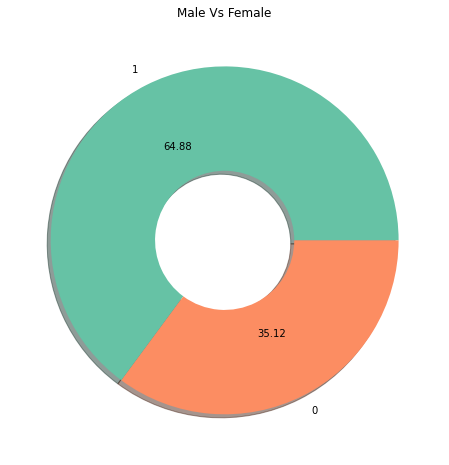

In [12]:
v = df['sex'].value_counts()
fig  =plt.gcf()
fig.set_size_inches((10,8))
cmap = plt.get_cmap('Set2')
color=  cmap(np.arange(len(v)))
plt.pie(v,labels = v.index ,autopct = '%0.02f', colors = color, shadow = True, wedgeprops = dict(width = 0.6), radius = 1)
plt.title('Male Vs Female')
plt.show()

<font color = "green" size = "5">Insight:</font>

**`~65% of the population are male while ~35% are female.`**

### 3.4 smoking Vs non- smoking

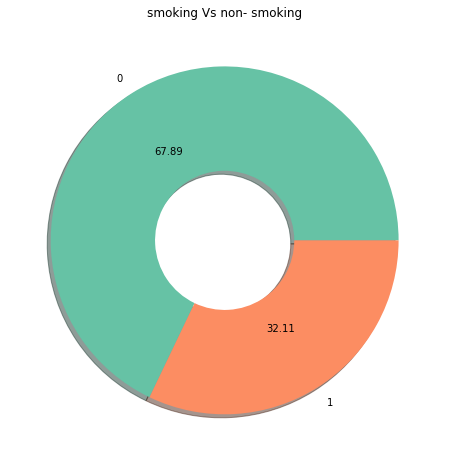

In [13]:
v = df['smoking'].value_counts()
fig  =plt.gcf()
fig.set_size_inches((10,8))
cmap = plt.get_cmap('Set2')
color=  cmap(np.arange(len(v)))
plt.pie(v,labels = v.index ,autopct = '%0.02f', colors = color, shadow = True, wedgeprops = dict(width = 0.6), radius = 1)
plt.title('smoking Vs non- smoking')
plt.show()

<font color = "green" size = "5">Insight:</font>

**`~68% of the population have smoking habits while ~32% are non-smokers.`**

### 3.5 Distribution of features

The gcf() function in pyplot module of matplotlib library is used to get the current Axes instance on the current figure matching the given keyword args, or create one.

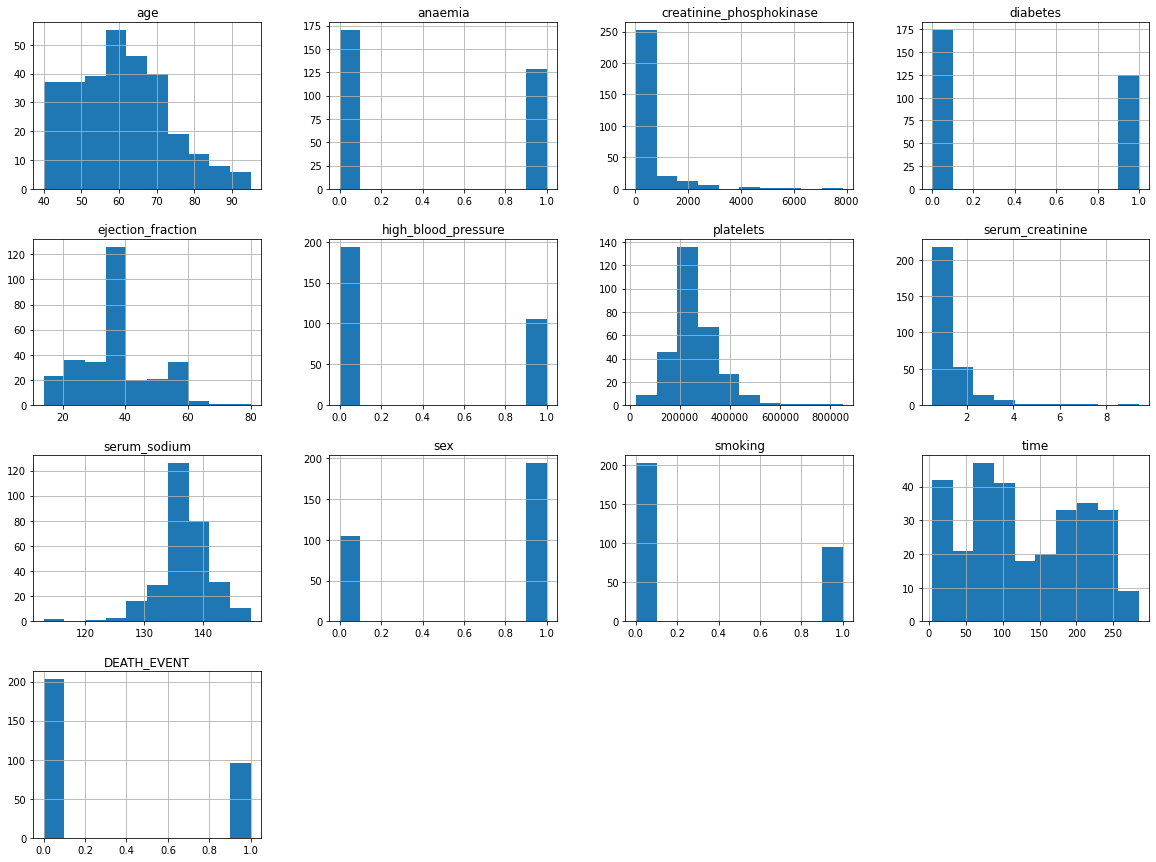

In [14]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

### 3.6 Checking the dataset is balanced or ont

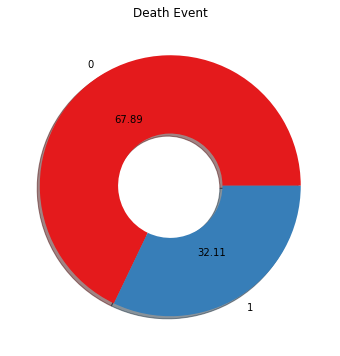

In [15]:
v=  df['DEATH_EVENT'].value_counts()
fig  =plt.gcf()
fig.set_size_inches((10,6))
cmap = plt.get_cmap('Set1')
color=  cmap(np.arange(len(v)))
plt.pie(v,labels = v.index ,autopct = '%0.02f', colors = color, shadow = True, wedgeprops = dict(width = 0.6))
plt.title('Death Event')
plt.show()

#### <font color = brown>Data Insight:</font>

**`1. In the population being studied for the condition of heart failure out of the 299 cases, 96 have succumbed to the condition while 203 cases survived.`**

**`2. In percentages, 32.11% of the cases succumbed (positive examples) while 67.89% cases survived (negative examples) the condition.`**



- Data is imbalanced & later we will use oversampling technique

## 4. Data preprocessing

### 4.1 Splitting data into depedent and independent variables

In [16]:
X = df.iloc[:,0:12]

In [17]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [18]:
y = df['DEATH_EVENT']

In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

#### We can see that the target class in the data set is imbalanced and thus it would result in overfitting the 0 class.
#### In order to overcome this, we would use the re-sampling technique to perform over-sampling of minority class (in this case 1).

### 4.3 SMOTE: Synthetic Minority Over-sampling Technique

In [20]:
from imblearn.over_sampling import SMOTE

X_smote, y_smote = SMOTE(sampling_strategy='auto', random_state = 0, k_neighbors=5).fit_sample(X,y)

y_smote.value_counts() # counting y

0    203
1    203
Name: DEATH_EVENT, dtype: int64

### 4.2 Splitting the dataset into train and test set

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,random_state=2,test_size=.20)

###  4.3 Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
X_train

array([[-0.83802155, -0.77714889, -0.48299637, ...,  0.8833005 ,
         1.71791138, -0.05405586],
       [-1.01107414,  1.28675472, -0.03404688, ..., -1.13211755,
        -0.5821022 ,  0.93453554],
       [-0.14581123,  1.28675472,  0.1375516 , ...,  0.8833005 ,
        -0.5821022 , -0.33460207],
       ...,
       [ 2.01734602, -0.77714889,  5.25358049, ...,  0.8833005 ,
         1.71791138, -0.58842959],
       [ 1.75776715,  1.28675472, -0.23657298, ...,  0.8833005 ,
        -0.5821022 , -1.37663084],
       [ 0.28682022, -0.77714889, -0.03404688, ..., -1.13211755,
        -0.5821022 ,  0.32000575]])

In [24]:
X_test

array([[ 0.28682022,  1.28675472, -0.56280961, -0.71202299, -1.01640039,
         1.5411035 ,  0.22927029, -0.18301945,  0.16795534, -1.13211755,
        -0.5821022 , -1.33655281],
       [-1.44370559, -0.77714889, -0.03404688, -0.71202299, -1.43494859,
         1.5411035 , -1.44227289,  0.07098229, -0.31361573,  0.8833005 ,
        -0.5821022 ,  0.85437948],
       [ 2.88260892,  1.28675472, -0.24455431, -0.71202299, -0.59785219,
        -0.64888568,  2.29084022,  0.40965128, -1.03597233,  0.8833005 ,
        -0.5821022 , -0.88233514],
       [-0.14581123, -0.77714889, -0.55582595, -0.71202299, -1.01640039,
         1.5411035 , -0.48392147,  1.67965999, -0.07283019,  0.8833005 ,
         1.71791138,  0.94789488],
       [-1.01107414,  1.28675472, -0.49995668, -0.71202299, -1.43494859,
        -0.64888568, -0.74022476, -0.60635568,  0.64952641,  0.8833005 ,
        -0.5821022 ,  0.40016181],
       [-0.31886381, -0.77714889, -0.47102438,  1.40444903,  0.07182494,
         1.5411035 ,  

## 5. Modeling

### 5.1 Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict the test set
y_pred = lr.predict(X_test)

# evauate the preformance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8536585365853658
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        39
           1       0.88      0.84      0.86        43

    accuracy                           0.85        82
   macro avg       0.85      0.85      0.85        82
weighted avg       0.85      0.85      0.85        82



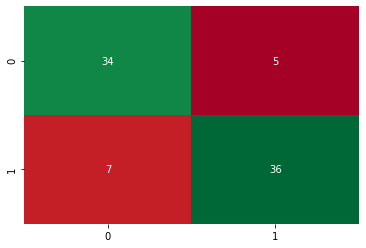

In [26]:
sns.heatmap(cm, annot = True, cbar = False, cmap  = 'RdYlGn')
plt.show()

### 5.2 KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier


#### Using error_rate find out optimum NO. of K value

In [28]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    score = knn.predict(X_test)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

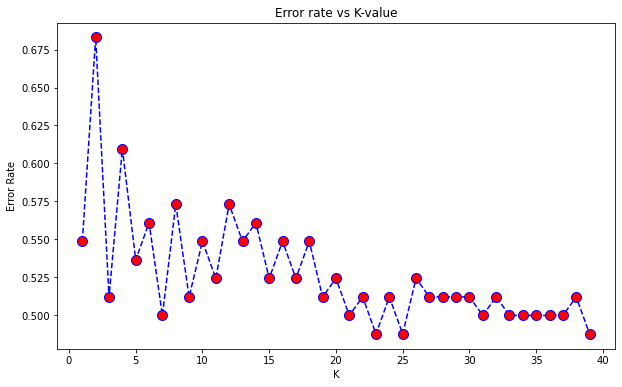

In [29]:
plt.figure(figsize =(10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error rate vs K-value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [30]:
# fitting KNN to train set

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

# Predict the test set
y_pred = knn.predict(X_test)

# evauate the preformance
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.7317073170731707
              precision    recall  f1-score   support

           0       0.71      0.74      0.72        39
           1       0.76      0.72      0.74        43

    accuracy                           0.73        82
   macro avg       0.73      0.73      0.73        82
weighted avg       0.73      0.73      0.73        82



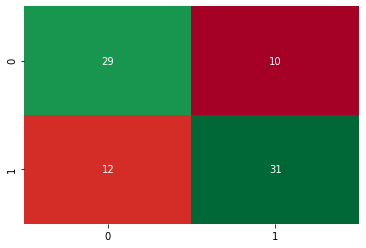

In [31]:
sns.heatmap(cm, annot = True, cbar = False, cmap  = 'RdYlGn')
plt.show()

### 5.3 DecisonTreeClassifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train,y_train)

# Predict the test set
y_pred = dt.predict(X_test)

# evauate the preformance
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7560975609756098
              precision    recall  f1-score   support

           0       0.79      0.67      0.72        39
           1       0.73      0.84      0.78        43

    accuracy                           0.76        82
   macro avg       0.76      0.75      0.75        82
weighted avg       0.76      0.76      0.75        82



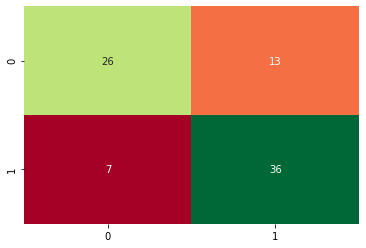

In [33]:
sns.heatmap(cm, annot = True, cbar = False, cmap  = 'RdYlGn')
plt.show()

### 5.4  Gaussian  Naive Bayes Classifier

In [34]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict the test set
y_pred = nb.predict(X_test)

# evauate the preformance
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7804878048780488
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        39
           1       0.86      0.70      0.77        43

    accuracy                           0.78        82
   macro avg       0.79      0.78      0.78        82
weighted avg       0.79      0.78      0.78        82



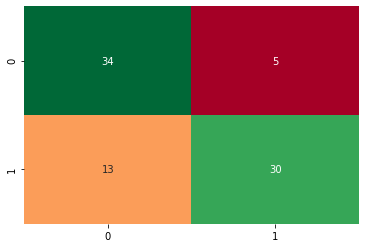

In [35]:
sns.heatmap(cm, annot = True, cbar = False, cmap  = 'RdYlGn')
plt.show()

### 5.5 SVM (Support Vector Machine)

In [36]:
from sklearn.svm import SVC

svc=SVC(kernel = 'rbf')
svc.fit(X_train, y_train)


# Predict the test set
y_pred = svc.predict(X_test)

# evaluate the preformance
from sklearn.metrics import confusion_matrix, accuracy_score, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print(accuracy_score(y_test, y_pred))

0.7682926829268293


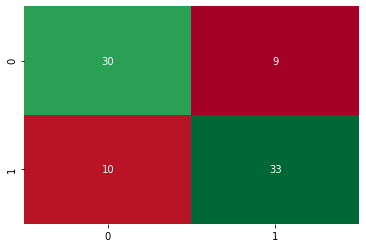

In [37]:
sns.heatmap(cm, annot = True, cbar = False, cmap  = 'RdYlGn')
plt.show()

### 5.6 Extra tree classifier

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier( n_estimators=100, criterion='gini', random_state = 5)
etc.fit(X_train, y_train)

# Predict the test set
y_pred = etc.predict(X_test)

# evaluate the preformance
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

0.8414634146341463


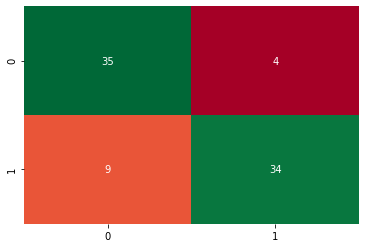

In [39]:
sns.heatmap(cm, annot = True, cbar = False, cmap  = 'RdYlGn')
plt.show()

###  5.7 RandomForest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50, criterion = 'gini', random_state = 4)
rf.fit(X_train, y_train)

# Predict the test set
y_pred = rf.predict(X_test)

# evauate the preformance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9024390243902439
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        39
           1       0.93      0.88      0.90        43

    accuracy                           0.90        82
   macro avg       0.90      0.90      0.90        82
weighted avg       0.90      0.90      0.90        82



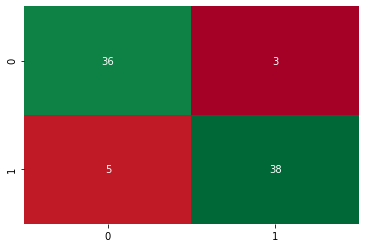

In [41]:
sns.heatmap(cm, annot = True, cbar = False, cmap  = 'RdYlGn')
plt.show()

## 6. Conclusion

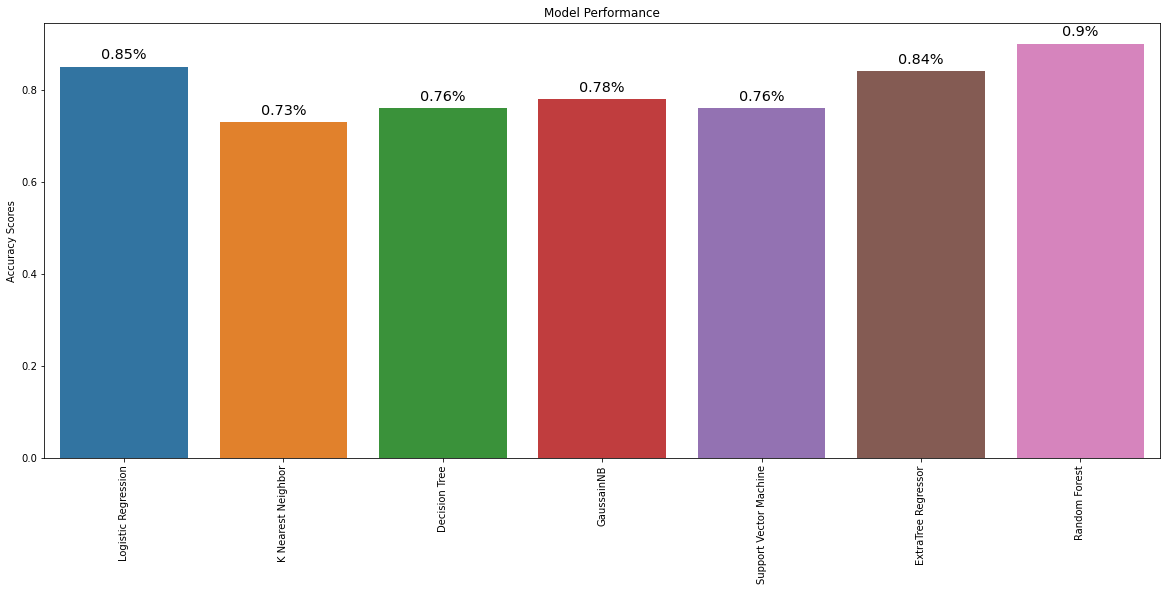

In [42]:
plt.figure(figsize = (20,8))

label = ['Logistic Regression','K Nearest Neighbor', 'Decision Tree', 'GaussainNB', 'Support Vector Machine', 'ExtraTree Regressor','Random Forest']
acc_score = [0.85,0.73, 0.76, 0.78, 0.76, 0.84, 0.90]

ax = sns.barplot(x = label, y = acc_score)
plt.xticks(rotation = 90)

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')



plt.title('Model Performance')
plt.ylabel('Accuracy Scores')
plt.show()


- After training our dataset with six different model, we conclude that __RandomForest__  is best model for our dataset. (via the highest accuracy score = 0.90)
